In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

We begin by defining a pandas dataframe that contains some cells with missing values. Note that pandas, in addition to allowing us to create dataframes from a variety of files, also supports explicit declaration.

In [2]:
df = pd.DataFrame(np.arange(5 * 4). reshape(5, 4))

In [3]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


### Data Sampling

To select a random subset without replacement, one way is to slice off the first k elements of the array returned by permutation, where k is the desired subset size. Here, we use the 'take' method, which retrieves elements along a given axis at the given indices. Using this function, we slice off the first three elements:

In [4]:
df_sampled_without_replacement = df.take(np.random.permutation(len(df))[:3])

In [5]:
df_sampled_without_replacement

,0,1,2,3
4,16,17,18,19
1,4,5,6,7
0,0,1,2,3


To generate a sample with replacement, we can draw random integers.

In [6]:
sampler = np.random.randint(0, len(df), size=3)

In [7]:
sampler

array([0, 2, 1])

These random integers can be used as input for the 'take' method, which is then used to sample the data. Since the random integers consistuting the array may be repeated, the rows sampled by this method may also be repeated -- or, in other words, sampled with replacement.

In [8]:
df_sampled_with_replacement = df.take(sampler)

In [9]:
df_sampled_with_replacement

,0,1,2,3
0,0,1,2,3
2,8,9,10,11
1,4,5,6,7


### Data Normalization or Standardization

Aside from sampling data, we may also want to normalize or standardize our data.

In [10]:
df_norm = df / df.sum().astype('float')
df_norm

,0,1,2,3
0,0.0,0.022222,0.04,0.054545
1,0.1,0.111111,0.12,0.127273
2,0.2,0.200000,0.20,0.200000
3,0.3,0.288889,0.28,0.272727
4,0.4,0.377778,0.36,0.345455


In [11]:
perm = np.random.permutation(len(df))
perm

array([1, 2, 3, 4, 0])

In [12]:
df_permuted = df.take(perm)
df_permuted

,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19
0,0,1,2,3


In [13]:
df_permuted_norm = df_permuted / df_permuted.sum().astype('float')
df_permuted_norm

,0,1,2,3
1,0.1,0.111111,0.12,0.127273
2,0.2,0.200000,0.20,0.200000
3,0.3,0.288889,0.28,0.272727
4,0.4,0.377778,0.36,0.345455
0,0.0,0.022222,0.04,0.054545


### The Iris Dataset as an Example

We will use the "Iris dataset" as an example for employing these methods. The Iris flower dataset or Fisher's Iris dataset is a well-known multivariate dataset introduced by Sir Ronald Fisher in 1936 as an example of discriminant analysis, a method for finding a linear combination of features that characterizes or separates two or more classes of objects or events. Fischer is famous for helping to develop the foundation for modern statistical science, and his method of linear discriminant analysis is perhaps the earliest classification method.

Let's fetch the Iris dataset from the UCI Machine Learning repository.

In [14]:
fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = pd.read_csv(fileURL, names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Name'], header=None)

In [15]:
data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


When read directly from the UCI Machine Learning repository, the Iris dataset has an extra line at the bottom that is read by pandas as a row of null values. Let's drop this final line:

In [16]:
iris_data = data.dropna()

To visualize this data, we can create a scatter plot matrix. In pandas, the scatter_matrix function generates a matrix of pairwise scatterplots, optiorally with histograms (or kernel density estimates) on the diagonal. Here's the scatter plot matrix with histograms on the diagonal:

In [17]:

my_colors = ['g', 'b','r','c']
pl1 = pd.tools.plotting.scatter_matrix(iris_data, diagonal='hist', figsize=(10,10), color=my_colors, s=100)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  app.launch_new_instance()


ValueError: 'c' argument has 4 elements, which is not acceptable for use with 'x' with size 150, 'y' with size 150.

We can also use boxplots to visualize the variability of each feature:

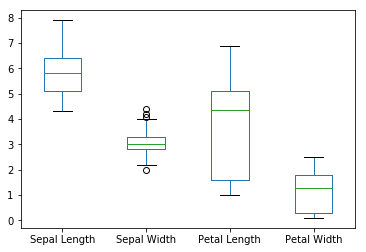

In [18]:
pl2 = iris_data.boxplot(grid=False)

Notice that Sepal Width has several outliers. In certain circumstances, it may be beneficial to remove these outliers. In this example, we interpolate over these outliers, replacing them with values that are more likely given the other data:

In [19]:
iris_data['Sepal Width'] = np.where((iris_data['Sepal Width'] > 4) | (iris_data['Sepal Width'] < 2.1), np.nan, iris_data['Sepal Width'])
iris_data['Sepal Width'] = iris_data['Sepal Width'].interpolate()

Once again using boxplots to visualize the data, notice that the outliers are now absent:

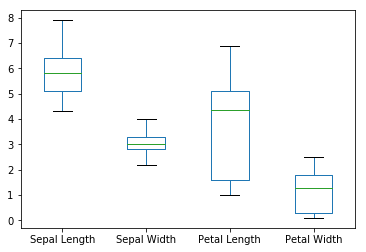

In [20]:
pl3 = iris_data.boxplot(grid=False)

With outliers removed, we may now be interested in sampling the data. Here, we use sampling with replacement to select 100 instances from the dataset:

In [21]:
sampler = np.random.randint(0, len(iris_data), size=100)
iris_data = iris_data.take(sampler)
iris_data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
128,6.4,2.8,5.6,2.1,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
43,5.0,3.5,1.6,0.6,Iris-setosa


Now with the data cleaned and sampled, we may be interested in standardizing the data. Here, we use z-score normalization to rescale each feature. z-score normalization converts all features to a common scale with an average of zero and standard deviation of one:

In [22]:
iris_data = iris_data.groupby('Name').transform(lambda x: (x-x.mean())/x.std(ddof=1))

Using boxplots once again, now we can see that each feature has been normalized, with each feature displaying an average of zero and a standard deviation of one:

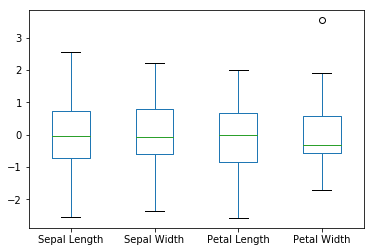

In [23]:
pl4 = iris_data.boxplot(grid=False)

Visualizating the data with a scatter plot matrix once again, we can now observe dramatic changes in the data. Each feature now displays a histogram that more closely resembles a normal distribution. Additionally, the separation previously observable in the scatter plots is now largely absent.

Depending on the objectives, these changes could be beneficial or detrimental. The use of data sampling, outlier removal, and data normalization are steps that depend critically the methods being employed.

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  if __name__ == '__main__':


ValueError: 'c' argument has 4 elements, which is not acceptable for use with 'x' with size 100, 'y' with size 100.

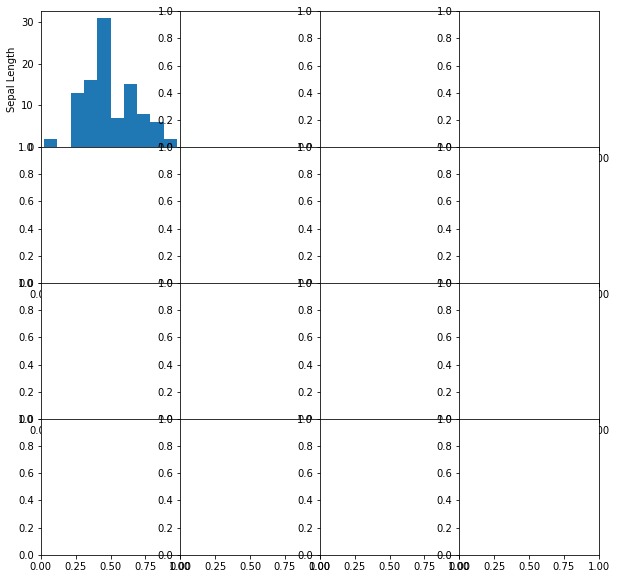

In [24]:
pl5 = pd.tools.plotting.scatter_matrix(iris_data, diagonal='hist', figsize=(10,10), color=my_colors, s=100)